<h1>Contrail Predicition Using Scmhidt-Appleman Diagram</h1>

<h4>Step 1 : Determine the G (isobaric line) Ratio</h4>

In [1]:
# Set the temperature range
start_temperature = 210
end_temperature = 235
step = 0.2

# Initialize an empty list to store temperatures
temperatures = []

# Generate temperatures in the specified range with the given step
current_temperature = start_temperature
while current_temperature <= end_temperature:
    temperatures.append(current_temperature)
    current_temperature += step

# Print or use the resulting array as needed
print("Temperatures:", temperatures)


Temperatures: [210, 210.2, 210.39999999999998, 210.59999999999997, 210.79999999999995, 210.99999999999994, 211.19999999999993, 211.39999999999992, 211.5999999999999, 211.7999999999999, 211.9999999999999, 212.19999999999987, 212.39999999999986, 212.59999999999985, 212.79999999999984, 212.99999999999983, 213.19999999999982, 213.3999999999998, 213.5999999999998, 213.79999999999978, 213.99999999999977, 214.19999999999976, 214.39999999999975, 214.59999999999974, 214.79999999999973, 214.99999999999972, 215.1999999999997, 215.3999999999997, 215.59999999999968, 215.79999999999967, 215.99999999999966, 216.19999999999965, 216.39999999999964, 216.59999999999962, 216.7999999999996, 216.9999999999996, 217.1999999999996, 217.39999999999958, 217.59999999999957, 217.79999999999956, 217.99999999999955, 218.19999999999953, 218.39999999999952, 218.5999999999995, 218.7999999999995, 218.9999999999995, 219.19999999999948, 219.39999999999947, 219.59999999999945, 219.79999999999944, 219.99999999999943, 220.19

In [2]:
#Determine the constant
EI = 1.2232 #kgH2O/kgton
c_p = 1004 #J/kgK
eps = 0.622
Q = 43*10**6 #J/kg
eff = 0.4 #assumed in Dischl et al., 2022
p = 236*100 #Pa

#Determine the G ratio (Pa/K)
G = (EI*c_p*p)/(eps*Q*(1-eff))
G 

#Determine the pressure based on G
G_press = [G * T for T in temperatures] #Pa

# Print or use the resulting array as needed
print("G Values:", G)
print("G_press Values:", G_press)

G Values: 1.8060638400757747
G_press Values: [379.2734064159127, 379.63461918392784, 379.99583195194293, 380.3570447199581, 380.71825748797323, 381.0794702559884, 381.4406830240035, 381.8018957920186, 382.1631085600338, 382.52432132804887, 382.885534096064, 383.24674686407917, 383.6079596320943, 383.9691724001094, 384.33038516812456, 384.6915979361397, 385.0528107041548, 385.41402347216996, 385.7752362401851, 386.13644900820026, 386.49766177621535, 386.8588745442305, 387.22008731224565, 387.5813000802608, 387.9425128482759, 388.30372561629105, 388.6649383843062, 389.0261511523213, 389.38736392033644, 389.7485766883516, 390.10978945636674, 390.47100222438183, 390.832214992397, 391.19342776041213, 391.5546405284272, 391.9158532964424, 392.27706606445753, 392.6382788324727, 392.9994916004878, 393.3607043685029, 393.7219171365181, 394.0831299045332, 394.4443426725483, 394.80555544056347, 395.1667682085786, 395.5279809765937, 395.88919374460886, 396.250406512624, 396.61161928063916, 396.972

<h4>Step 2 : TLM (Tangengt Line between G lines and saturation pressure for water(</h4>

In [3]:
import math

#Determine the TLM
T_LM = 226.69+(9.43*math.log(G-0.053))+(0.720*((math.log(G-0.053))**2)) #Kelvin
T_LM

232.21056626186893

<h4>Step 3 : Saturation presure for water and ice</h4>

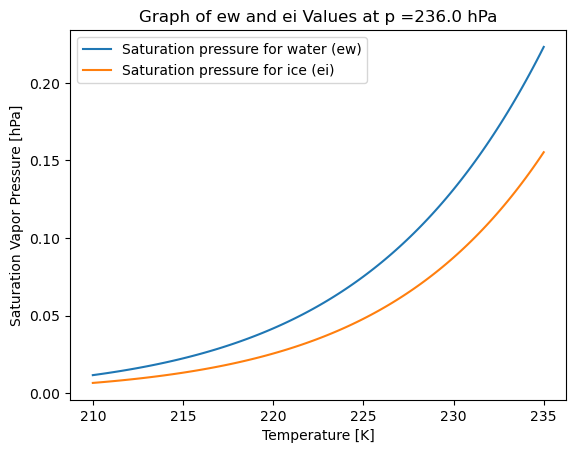

In [4]:
import matplotlib.pyplot as plt

# Initialize an empty list to store temperatures and corresponding ew and ei values
temperatures = []
ew_values = []
ei_values = []

# Generate temperatures in the specified range with the given step
current_temperature = start_temperature
while current_temperature <= end_temperature:
    temperatures.append(current_temperature)

    # Calculate ew using the Magnus Teten formula (Murray, 1967)
    ew = 6.1078 * math.exp(17.269388 * (current_temperature - 273.16) / (current_temperature - 35.86))
    ew_values.append(ew)

    # Calculate ei using the Magnus Teten formula (Murray, 1967)
    ei = 6.1078 * math.exp(21.8745584 * (current_temperature - 273.16) / (current_temperature - 7.66))
    ei_values.append(ei)

    current_temperature += step

# Plotting
plt.plot(temperatures, ew_values, label='Saturation pressure for water (ew)')
plt.plot(temperatures, ei_values, label='Saturation pressure for ice (ei)')
plt.xlabel('Temperature [K]')
plt.ylabel('Saturation Vapor Pressure [hPa]')
plt.legend()
plt.title(f'Graph of ew and ei Values at p ={p/100} hPa')
plt.show()

<h4>Step 4 : Determine the TLM point on Graph</h4>

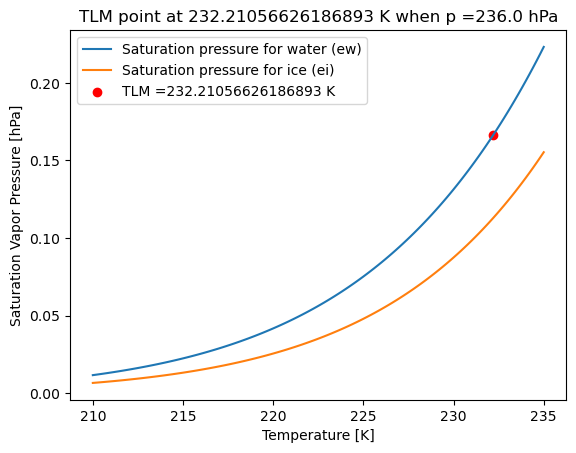

In [5]:
# Find the nearest temperature to TLM
target_temperature = T_LM
index = min(range(len(temperatures)), key=lambda i: abs(temperatures[i] - target_temperature))
nearest_temperature = temperatures[index]

# Find the corresponding saturated pressure
saturated_pressure_at_target_temperature = ew_values[index]

# Plotting
plt.plot(temperatures, ew_values, label='Saturation pressure for water (ew)')
plt.plot(temperatures, ei_values, label='Saturation pressure for ice (ei)')
plt.scatter([nearest_temperature], [saturated_pressure_at_target_temperature], color='red', label=f'TLM ={target_temperature} K')
plt.xlabel('Temperature [K]')
plt.ylabel('Saturation Vapor Pressure [hPa]')
plt.legend()
plt.title(f'TLM point at {T_LM} K when p ={p/100} hPa')
plt.show()


<h4>Step 5 : Generate the Isobaric Mixing Line on the Graph</h4>

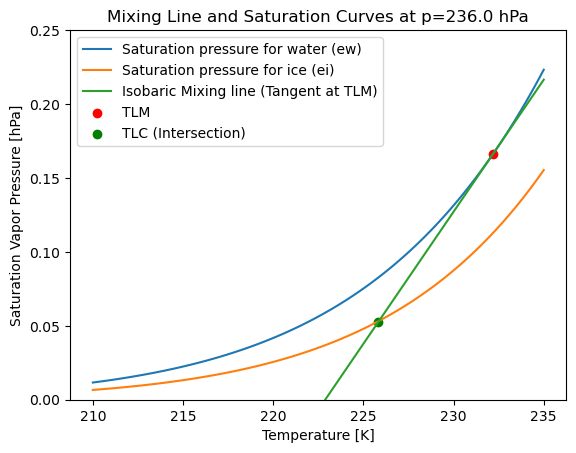

In [6]:
import numpy as np

# Calculate the slope of the tangent line at the TLM point
#delta_T = 0.01  # small change in temperature for slope calculation
index = temperatures.index(nearest_temperature)
slope = (ew_values[index + 1] - ew_values[index]) / (temperatures[index + 1] - temperatures[index])

# Determine the intercept of the tangent line
intercept = ew_values[index] - slope * temperatures[index]

# Generate temperatures for the mixing line
mixing_line_temps = np.linspace(start_temperature, end_temperature, 100)
mixing_line_ew_values = slope * mixing_line_temps + intercept

# Find the intersection of the mixing line and saturation curve for ice
def find_intersection(temperatures, ew_values, mixing_line_slope, mixing_line_intercept):
    for i in range(len(temperatures) - 1):
        if (ew_values[i] - (mixing_line_slope * temperatures[i] + mixing_line_intercept)) * (
                ew_values[i + 1] - (mixing_line_slope * temperatures[i + 1] + mixing_line_intercept)) <= 0:
            x1, y1 = temperatures[i], ew_values[i]
            x2, y2 = temperatures[i + 1], ew_values[i + 1]
            return x1, y1, x2, y2
    return None

# Find the intersection point
intersection_point = find_intersection(temperatures, ei_values, slope, intercept)

# Plotting the mixing line and saturation curves with limited y-axis range
plt.plot(temperatures, ew_values, label='Saturation pressure for water (ew)')
plt.plot(temperatures, ei_values, label='Saturation pressure for ice (ei)')
plt.plot(mixing_line_temps, mixing_line_ew_values, label='Isobaric Mixing line (Tangent at TLM)')

# Find the index where saturation vapor pressure is close to 0
#zero_index = np.argmax(mixing_line_ew_values <= 0.3)

# Plot the mixing line 
plt.scatter([nearest_temperature], [saturated_pressure_at_target_temperature], color='red',
            label='TLM')
if intersection_point:
    plt.scatter(intersection_point[0], intersection_point[1], color='green', label='TLC (Intersection)')

plt.xlabel('Temperature [K]')
plt.ylabel('Saturation Vapor Pressure [hPa]')
plt.legend()
plt.title(f'Mixing Line and Saturation Curves at p={p/100} hPa')
plt.ylim(0, 0.25)  # Set y-axis range
plt.show()


<h4>Step 6 : T_LC to create the Schmidt-Appleman Diagram (on progress)</h4>

In [7]:
#The Lowest Critical Temperature
# Find the intersection point
intersection_point = find_intersection(temperatures, ei_values, slope, intercept)

# Display the TLC (Triple Line Crossing) values
if intersection_point:
    tlc_temperature, tlc_pressure = intersection_point[0], intersection_point[1]
    print(f"TLC Temperature: {tlc_temperature} K")
    print(f"TLC Saturation Pressure : {tlc_pressure} hPa")
else:
    print("No intersection found. TLC not determined.")

TLC Temperature: 225.7999999999991 K
TLC Saturation Pressure : 0.05288787951177541 hPa


<h4>Step 7 : Find the pressure on various altitude following ISA formula</h4>

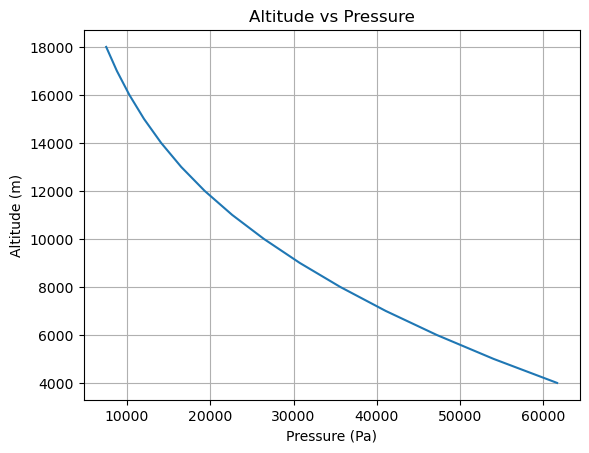

In [8]:
import matplotlib.pyplot as plt

# Given constants
p_0 = 101325  # Pa (sea level)
T_0 = 288.15  # K (temp at sea level)
beta = -0.0065  # K/m (vertical temp gradient)
g_0 = 9.80665  # m/s^2 (gravity acc)
R = 287.05287  # J/K.kg (specific gas constant)
T_high = 216.65  # K (constant temp, [ICAO,1993])

# Generate array of altitudes from 4000 m to 18000 m with a step of 100 m
altitudes = np.arange(4000, 18001, 1000)

# Calculate pressures based on altitude
pressures = []
for h in altitudes:
    if h <= 11000:
        p_low = p_0 * ((1 + (beta * h) / T_0) ** (-g_0 / (beta * R)))
        pressures.append(p_low)
    else:
        p_11 = p_0 * ((1 + (beta * 11000) / T_0) ** (-g_0 / (beta * R)))
        p_high = p_11 * np.exp(-(g_0 / (R * T_high)) * (h - 11000))
        pressures.append(p_high)

# Plotting
plt.plot(pressures, altitudes)
plt.ylabel('Altitude (m)')
plt.xlabel('Pressure (Pa)')
plt.title('Altitude vs Pressure')
plt.grid(True)
plt.show()


<h4>Step 8 : Vary the altitude, so we can get the various TLC</h4>

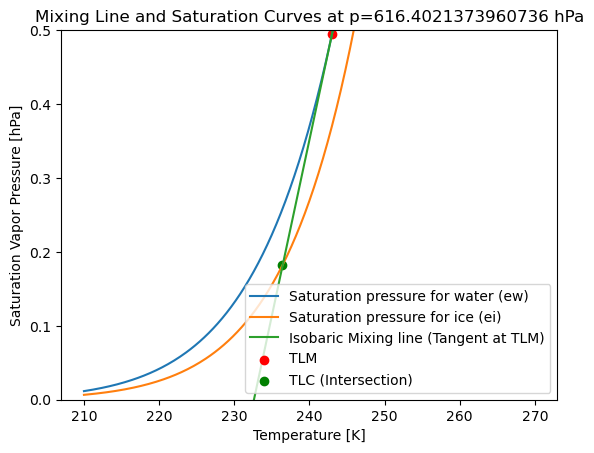

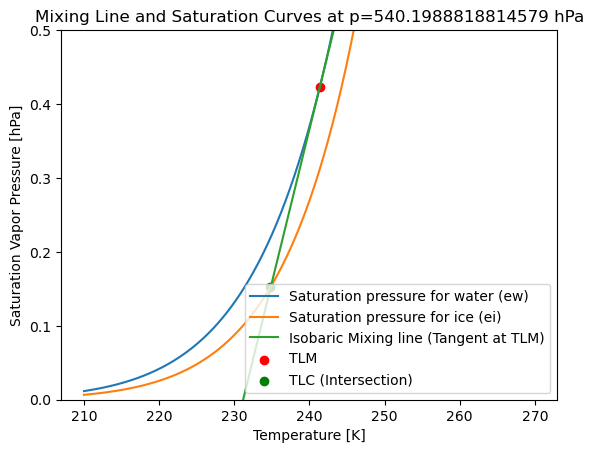

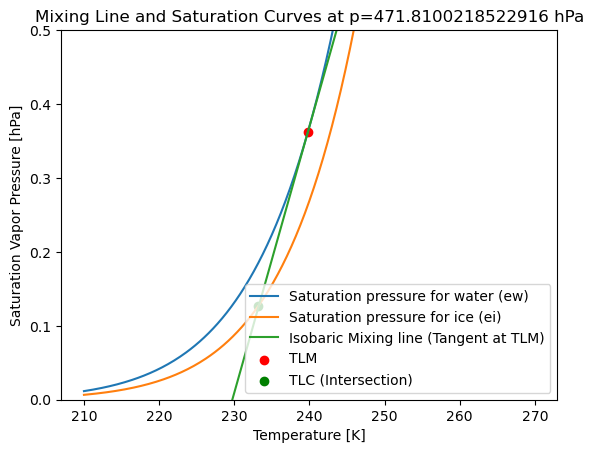

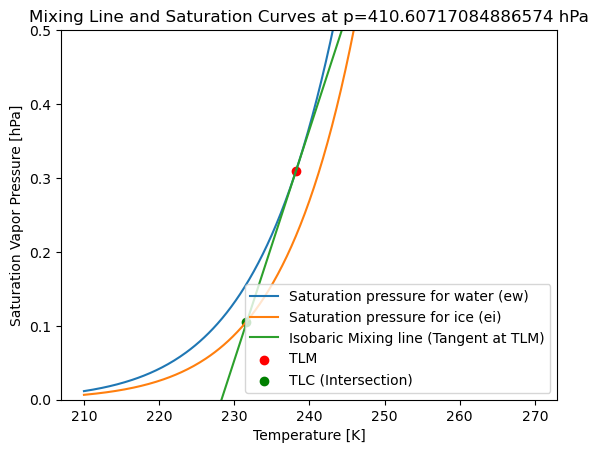

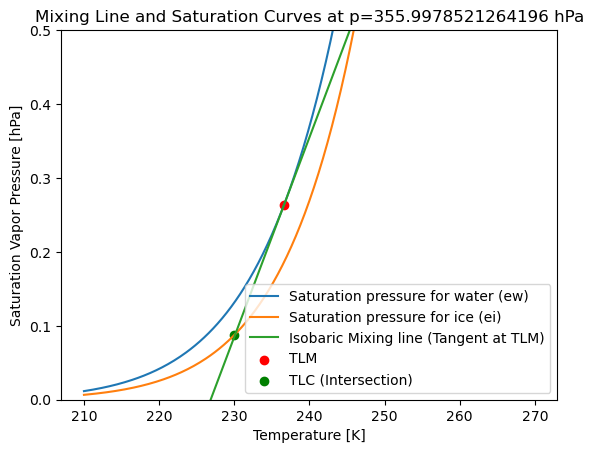

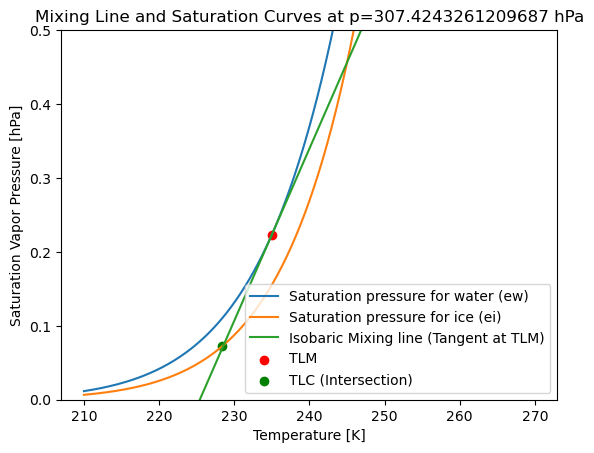

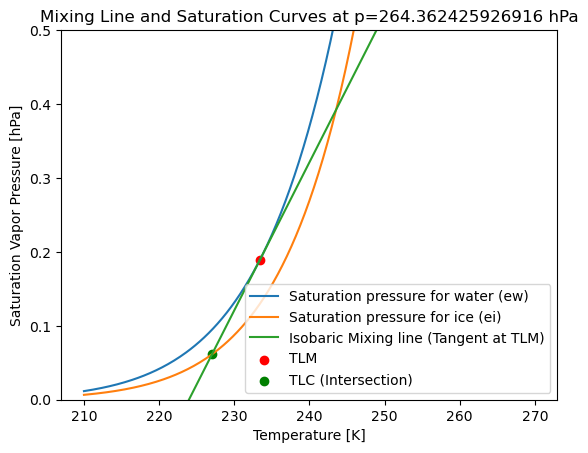

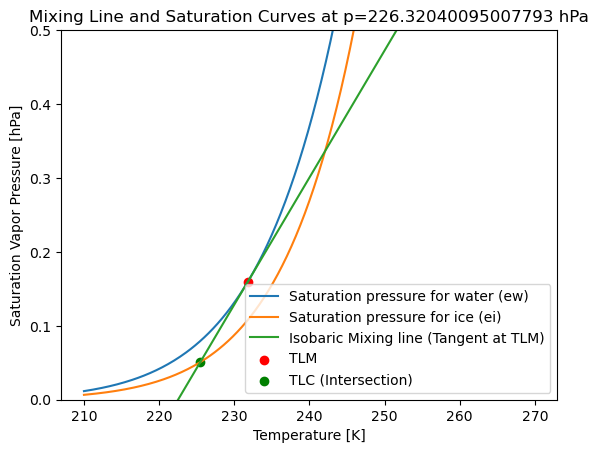

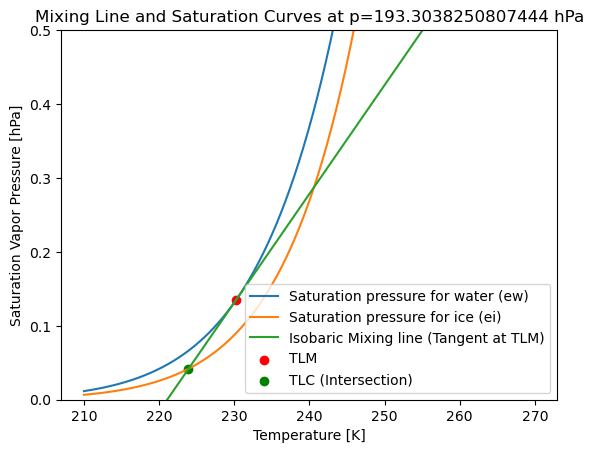

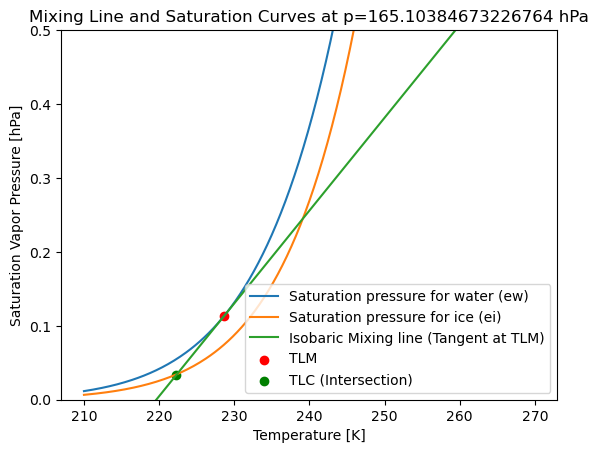

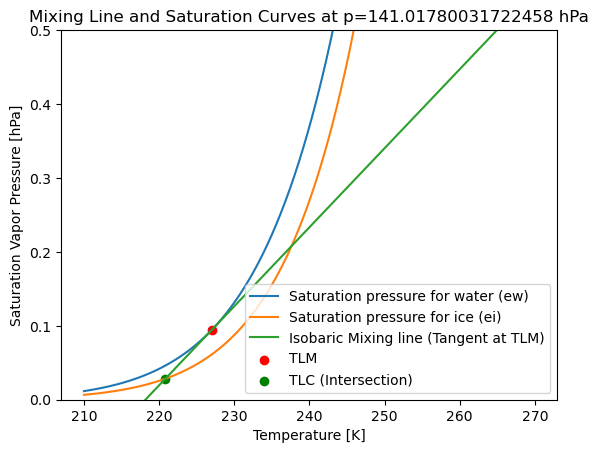

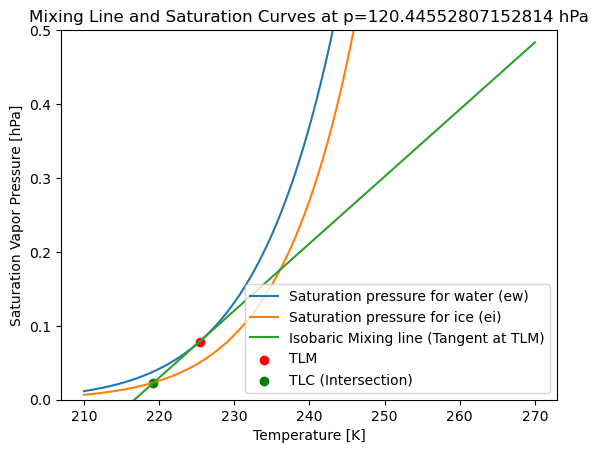

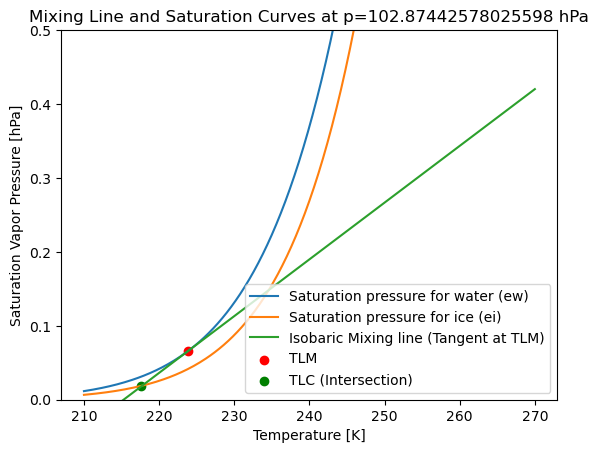

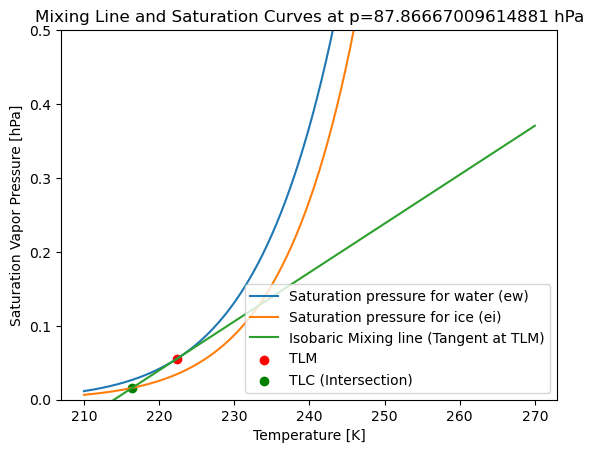

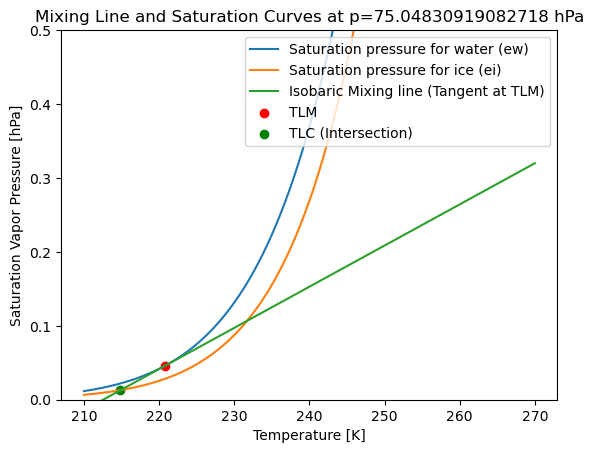

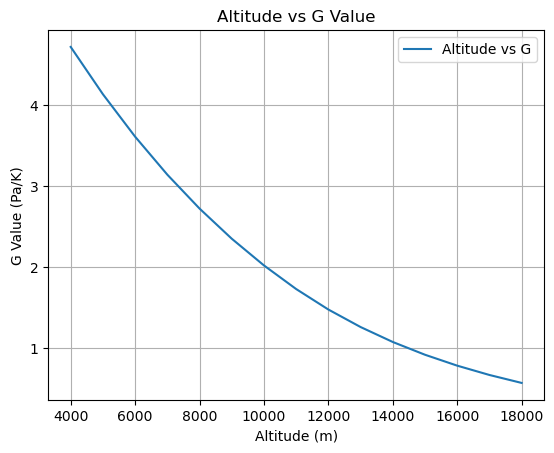

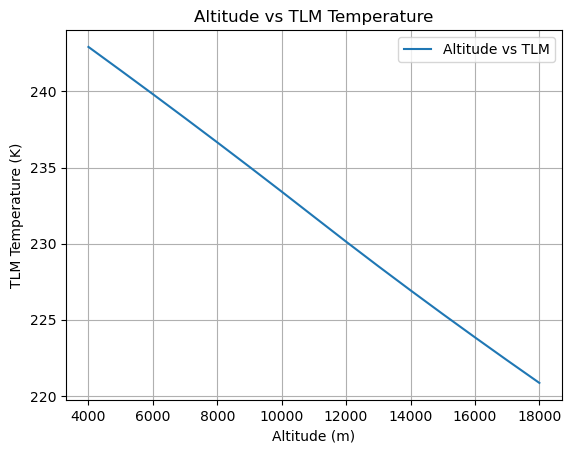

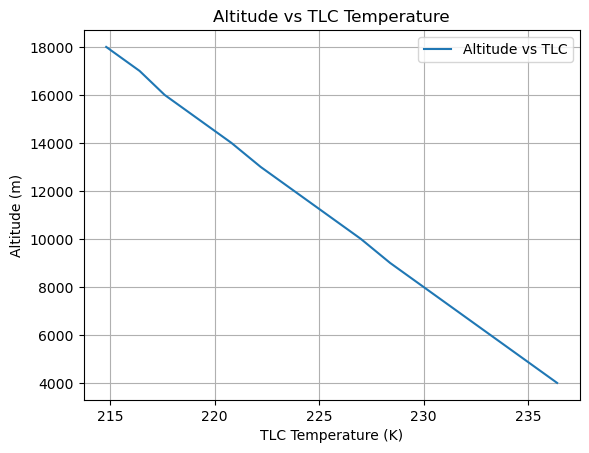

In [9]:
import math
import numpy as np


# Set the temperature range
start_temperature = 210
end_temperature = 270
step = 0.2

# Initialize an empty list to store temperatures and corresponding ew and ei values
temperatures = []
ew_values = []
ei_values = []

# Generate temperatures in the specified range with the given step
current_temperature = start_temperature
while current_temperature <= end_temperature:
    temperatures.append(current_temperature)

    # Calculate ew using the Magnus Teten formula (Murray, 1967)
    ew = 6.1078 * math.exp(17.269388 * (current_temperature - 273.16) / (current_temperature - 35.86))
    ew_values.append(ew)

    # Calculate ei using the Magnus Teten formula (Murray, 1967)
    ei = 6.1078 * math.exp(21.8745584 * (current_temperature - 273.16) / (current_temperature - 7.66))
    ei_values.append(ei)

    current_temperature += step


#Determine the constant
EI = 1.2232  # kgH2O/kgton
c_p = 1004  # J/kgK
eps = 0.622
Q = 43 * 10**6  # J/kg
eff = 0.4  # assumed in Dischl et al., 2022
p_0 = 236 * 100  # Pa

# Generate pressures based on altitude
p_low_values = [p_0 * ((1 + (beta * h) / T_0) ** (-g_0 / (beta * R))) for h in altitudes]
p_high_values = [p_0 * ((1 + (beta * 11000) / T_0) ** (-g_0 / (beta * R))) * np.exp(-(g_0 / (R * T_high)) * (h - 11000)) for h in altitudes]

# Initialize empty lists to store G, TLM, and TLC values
G_values = []
TLM_values = []
TLC_values = []

# Loop over pressures and calculate G, TLM, and TLC for each
for p in pressures:
    # Determine the G ratio (Pa/K) based on the given pressure
    G = (EI * c_p * p) / (eps * Q * (1 - eff))
    G_values.append(G)

    # Determine the TLM based on G
    T_LM = 226.69 + (9.43 * math.log(G - 0.053)) + (0.720 * ((math.log(G - 0.053))**2))
    TLM_values.append(T_LM)


    # Find the nearest temperature to TLM
    target_temperature = T_LM
    index = min(range(len(temperatures)), key=lambda i: abs(temperatures[i] - target_temperature))
    nearest_temperature = temperatures[index]

    # Find the corresponding saturated pressure
    saturated_pressure_at_target_temperature = ew_values[index]

    # Calculate the slope of the tangent line at the TLM point
    slope = (ew_values[index + 1] - ew_values[index]) / (temperatures[index + 1] - temperatures[index])

    # Determine the intercept of the tangent line
    intercept = ew_values[index] - slope * temperatures[index]

    # Generate temperatures for the mixing line
    mixing_line_temps = np.linspace(start_temperature, end_temperature, 100)
    mixing_line_ew_values = slope * mixing_line_temps + intercept

    # Find the intersection of the mixing line and saturation curve for ice
    intersection_point = find_intersection(temperatures, ei_values, slope, intercept)

    # Plotting the mixing line and saturation curves with limited y-axis range
    plt.plot(temperatures, ew_values, label='Saturation pressure for water (ew)')
    plt.plot(temperatures, ei_values, label='Saturation pressure for ice (ei)')
    plt.plot(mixing_line_temps, mixing_line_ew_values, label='Isobaric Mixing line (Tangent at TLM)')

    # Plot the mixing line
    plt.scatter([nearest_temperature], [saturated_pressure_at_target_temperature], color='red', label='TLM')
    if intersection_point:
        plt.scatter(intersection_point[0], intersection_point[1], color='green', label='TLC (Intersection)')
    
    plt.xlabel('Temperature [K]')
    plt.ylabel('Saturation Vapor Pressure [hPa]')
    plt.legend()
    plt.title(f'Mixing Line and Saturation Curves at p={p/100} hPa')
    plt.ylim(0, 0.5)  # Set y-axis range
    plt.show()

    # Store the TLC value
    if intersection_point:
        tlc_temperature, tlc_pressure = intersection_point[0], intersection_point[1]
        TLC_values.append(tlc_temperature)
    else:
        TLC_values.append(None)

# Plotting Altitude vs G
plt.plot(altitudes, G_values, label='Altitude vs G')
plt.xlabel('Altitude (m)')
plt.ylabel('G Value (Pa/K)')
plt.title('Altitude vs G Value')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Altitude vs TLM
plt.plot(altitudes, TLM_values, label='Altitude vs TLM')
plt.xlabel('Altitude (m)')
plt.ylabel('TLM Temperature (K)')
plt.title('Altitude vs TLM Temperature')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Altitude vs TLC
plt.plot(TLC_values, altitudes, label='Altitude vs TLC')
plt.ylabel('Altitude (m)')
plt.xlabel('TLC Temperature (K)')
plt.title('Altitude vs TLC Temperature')
plt.grid(True)
plt.legend()
plt.show()


<h4>Step 9 : Relation between Relative humidity and pressure</h4>

#The constant value
CF = 0.0336 #g/(kg K)

#Determine the value of P
P1 = 23.83224 + 8.132801 * (10 **(-3) * (10 **(3.49149 - (1302.8844 / Tnew))))
P2 = 1.3816 * (10 **(-7)) * (10 **(11.334 - (0.0303998 * Tnew)))
P3 = 2949.076 / Tnew
P4 = 5.02808 * (np.log(Tnew) / np.log(10))
    
P5 = 2949.08 / (Tnew ** 2)
P6 = 5.02808 / (Tnew * np.log(10))
P7 = (4.20004 * 10 **(-9)) * ((10 **(11.344 - (0.0303998 * Tnew)))) * (np.log(10))
P8 = 10.5961 * 10 **(3.49149 - (1302.88 / Tnew)) * (np.log(10) / (Tnew ** 2))
    

#Determine the value of pressure on function of relative humidity (U) and T
p_cf = ((1 / U) * (10 **(P1 - P2 - P3 - P4)) * (np.log(10) * (P5 - P6 + P7 + P8))) * (622 / CF)

<h4>Appleman and Improved Equation (Hanson, 1995)</h4>

The different is they are using different ewuation that denotes the relation between altitude and relative humidity. The equation is:

For 0 mb < p < 226 mb

alt = 11000 + 6341.62*(math.log(226.0546/p))

For 227 mb < p < 1000 mb

alt = 44330.77*(1-((P/1013.25)**0.1901))

In [11]:
import math
import numpy as np
import pandas as pd

# Given constants
p_0 = 101325  # Pa (sea level)
T_0 = 288.15  # K (temp at sea level)
beta = -0.0065  # K/m (vertical temp gradient)
g_0 = 9.80665  # m/s^2 (gravity acc)
R = 287.05287  # J/K.kg (specific gas constant)
T_high = 216.65  # K (constant temp, [ICAO,1993])
CF = 0.0336 #g/(kg K)

# Function to calculate pressure function
def calculate_pressure_function(Tnew, U):
    if Tnew <= 0 or U == 0:
        return float('inf')  # Return a large value for cases where division by zero might occur
    else:
        P1 = 23.83224 + 8.132801 * (10 **(-3) * (10 **(3.49149 - (1302.8844 / Tnew))))
        P2 = 1.3816 * (10 **(-7)) * (10 **(11.334 - (0.0303998 * Tnew)))
        P3 = 2949.076 / Tnew
        P4 = 5.02808 * (np.log(Tnew) / np.log(10))
    
        P5 = 2949.08 / (Tnew ** 2)
        P6 = 5.02808 / (Tnew * np.log(10))
        P7 = (4.20004 * 10 **(-9)) * ((10 **(11.344 - (0.0303998 * Tnew)))) * (np.log(10))
        P8 = 10.5961 * 10 **(3.49149 - (1302.88 / Tnew)) * (np.log(10) / (Tnew ** 2))
    
        p_cf = ((1 / U) * (10 **(P1 - P2 - P3 - P4)) * (np.log(10) * (P5 - P6 + P7 + P8))) * (622 / CF)
    
        return p_cf

# Function to calculate altitude based on pressure
def calculate_altitude(pressure):
    if 0 < pressure < 226:
        altitude = 11000 + 6341.62 * (math.log(226.0546 / pressure))
    elif 226 <= pressure <= 1000:
        altitude = 44330.77 * (1 - ((pressure / 1013.25) ** 0.1901))
    else:
        altitude = np.nan  # Return NaN for invalid pressure values
    return altitude

# Set the range and step for variable pressure (p_cf)
start_pressure = 100
end_pressure = 1000
step_pressure = 100

# Set the values for variable U
U_values = [0.2, 0.4, 0.6, 0.8, 1]

# Initialize lists to store results
pressure_values = []
altitude_values = []  # Added for altitude
U_values_list = []
Tnew_values = []

# Maximum number of iterations
max_iterations = 100000

# Loop over different values of pressure (p_cf), U, and calculate Tnew
for pressure in np.arange(start_pressure, end_pressure + step_pressure, step_pressure):
    for U in U_values:
        p_cf = pressure
        Tnew_guess = 220  # Starting guess for Tnew
        tol = 1e-1 # Tolerance for convergence
        iter_count = 0

        # Iterative process to determine Tnew
        while iter_count < max_iterations:
            calculated_p_cf = calculate_pressure_function(Tnew_guess, U)
            if math.isclose(calculated_p_cf, p_cf, abs_tol=tol):
                break
            elif calculated_p_cf < p_cf:
                Tnew_guess += 0.01
            else:
                Tnew_guess -= 0.01

            iter_count += 1

        # Check if the iteration converged within the maximum iterations
        if iter_count == max_iterations:
            print(f"Warning: Iteration did not converge for pressure {pressure} and U {U}")

        # Calculate altitude based on pressure
        altitude = calculate_altitude(p_cf)

        # Append the values to the lists
        pressure_values.append(p_cf)
        altitude_values.append(altitude)
        U_values_list.append(U)
        Tnew_values.append(Tnew_guess)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Altitude (m)': altitude_values,
    'Pressure (mb)': pressure_values,
    'Relative Humidity (U)': U_values_list,
    'Temperature (Tnew)': Tnew_values
})

# Reorder columns for clarity
results_df = results_df[['Altitude (m)', 'Pressure (mb)', 'Relative Humidity (U)', 'Temperature (Tnew)']]

# Pivot the DataFrame to get the desired format
pivot_df = results_df.pivot(index='Altitude (m)', columns='Relative Humidity (U)', values='Temperature (Tnew)')

# Display the pivoted DataFrame
print(pivot_df)


Relative Humidity (U)     0.2     0.4     0.6     0.8     1.0
Altitude (m)                                                 
110.789494             227.01  234.18  238.64  241.92  244.56
987.662217             225.96  233.06  237.46  240.72  243.30
1947.354346            224.81  231.82  236.16  239.37  241.93
3009.688084            223.52  230.43  234.72  237.87  240.39
4202.993171            222.04  228.84  233.06  236.16  238.64
5569.968879            220.34  227.01  231.14  234.19  236.62
7179.800547            218.28  224.81  228.85  231.82  234.19
9156.969395            215.70  222.04  225.96  228.85  231.14
11776.589689           212.19  218.28  222.04  224.81  227.01
16172.265713           206.50  212.19  215.71  218.29  220.33


<Figure size 640x480 with 0 Axes>

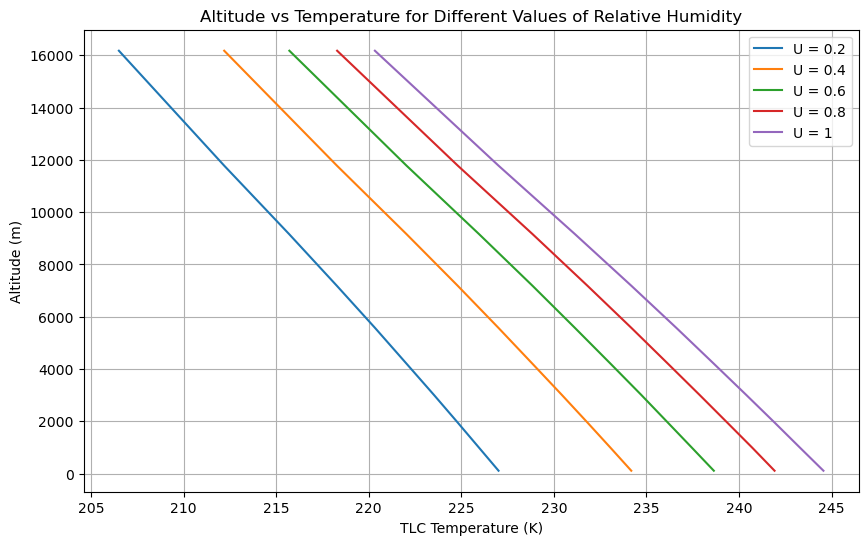

In [12]:
# Clear the figure
plt.clf()

# Plotting
plt.figure(figsize=(10, 6))

for U_value in U_values:
    subset_df = results_df[results_df['Relative Humidity (U)'] == U_value]
    plt.plot(subset_df['Temperature (Tnew)'], subset_df['Altitude (m)'], label=f'U = {U_value}')

# Add labels and title
plt.xlabel('TLC Temperature (K)')
plt.ylabel('Altitude (m)')
plt.title('Altitude vs Temperature for Different Values of Relative Humidity')
plt.legend()
plt.grid(True)
plt.show()